## Decision Tree Adventures 1 - Simplest Case

### Abstract

It is the first notebook of a series about decision trees. The followings are included in this first one:

- Basic visualization of data

- One Hot Encoding

- Modelling a decision tree with default parameters (without any tuning)

- Creating a pdf file to present the decision tree

- Small hints (e.g. why drop_first should be applied after one hot encoding?, why one hot encoding is required for a decision tree?)

In later notebooks following topics will be explained in detail:

- Mechanism of decision tree models

- Parameter explanation and tuning of a decision tree

- Pruning details for a decision tree

- Applying Random Forest for the same data

- Applying XGBoost for the same data

- Applying Light GBM for the same data

- Comparison of decision tree models applied


### Explanation of the Study

A classification decision tree is modelled to predict the success in math of a student depending on the features (gender, race/ethnicity, parental level of education, lunch, test preparation course). 

Model is established by using just default parameters that is why the tree is very big and most probably overfitting and accuracy rate is 43%.

Tuning is the topic of other notebooks.

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 
import numpy as np

### Loading and Displaying the Dataset

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Visualizations

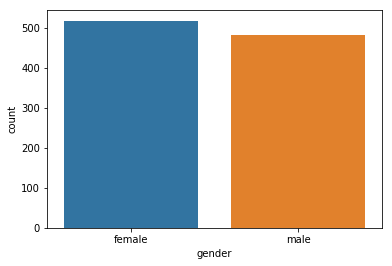

In [3]:
ax = sns.countplot(x="gender", data=dataset)

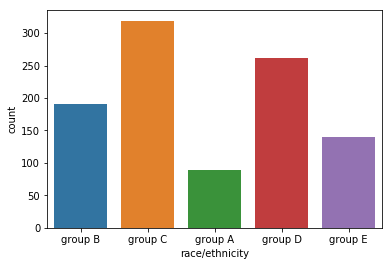

In [4]:
ax = sns.countplot(x="race/ethnicity", data=dataset)

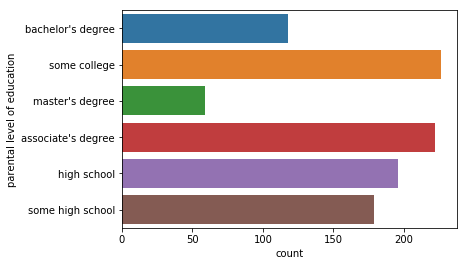

In [5]:
ax = sns.countplot(y="parental level of education", data=dataset)

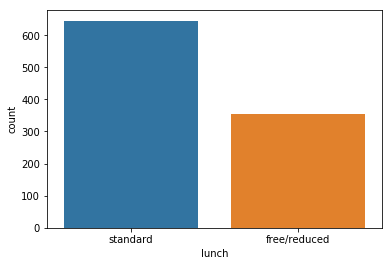

In [6]:
ax = sns.countplot(x="lunch", data=dataset)

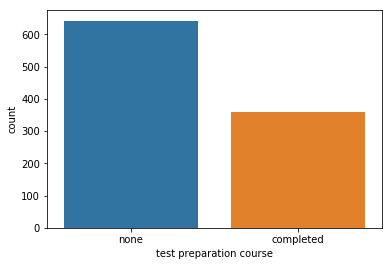

In [7]:
ax = sns.countplot(x="test preparation course", data=dataset)

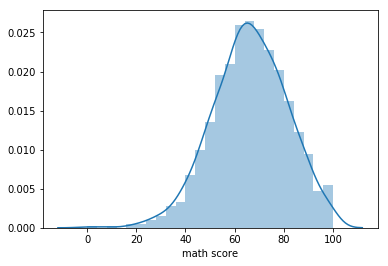

In [8]:
ax = sns.distplot(dataset["math score"]);

### Data Processing

Lets create a new feature, named as math grade. Math grade is Pass if math score is above 60, math grade Fail if math score is below 60. It is just an assumption. After creating the new column, I have removed the unneccasry columns and check the latest form of dataset again.

#### *Hint: it is a good example for changing some rows of a column according to some conditional expressions on values of other columns. 

In [9]:
dataset["math grade"] = ""
dataset.loc[(dataset["math score"] >= 60), "math grade"] = "Pass"
dataset.loc[(dataset["math score"] < 60), "math grade"] = "Fail"
dataset.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math grade
0,female,group B,bachelor's degree,standard,none,Pass
1,female,group C,some college,standard,completed,Pass
2,female,group B,master's degree,standard,none,Pass
3,male,group A,associate's degree,free/reduced,none,Fail
4,male,group C,some college,standard,none,Pass


### One Hot Encoding

#### *Hint: One hot encoding is necessary if you use scikit-learn library for modelling. 

Scikit-learn uses only numerical features and these numerical features are considered as continuos numeric values. In our case race feature includes group A, group B, group C, group D, group E and it will be encoded as 1,2,3,4,5 under one column if you use just label encoding not one hot encoding. Till now everything is fine but problem starts here. Since model assumes that all numerical values are continuous, you will see such internal nodes (splitting point): "race < 4 which means group A race < group B race" which is very weird. Weird because there is no continouity among race values. It would be the same if our feature was color. It may be acceptable for parental level of education if you set the order correctly because there is a continuity. Of course master's degree is higher than bachelor's degree and it is higher than some college etc. That is why we have to apply one hot encoding if we use scikit-learn. 

#### *Hint: Dropping one of the one hot encoded columns are a good approach otherwise weigths and effects of features over the model may be higher or lower. 

Assume that in our dataset we have only age and gender features. Since age is continous numeric variable that is good for scikit-learn but we have to apply one hot encoding for gender. After applying it we have 3 features, age, gender_male, gender_female. Lets give an example, lets say our person is male so as values gender_male is 1 and gender_female is 0 and lets say age is 20. That sounds ok but not actually. Lets say you are talking with the model and you check age feature and tell "this person is 20 years old". And then you check gender_male feature and tell "this person is male". And then you check gender_female column and tell "this person is not a female (which means person is a male)". Just to tell the model once about the person's gender, you have to drop one of the one hot encoded columns and drop_first=True makes it for us.


In [10]:
one_hot = pd.get_dummies(dataset['gender'], prefix='gender', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['race/ethnicity'], prefix='race/ethnicity', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['parental level of education'], prefix='parental level of education', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['lunch'], prefix='lunch', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['test preparation course'], prefix='test preparation course', drop_first=True)
dataset = dataset.join(one_hot)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,female,group B,bachelor's degree,standard,none,Pass,0,1,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,Pass,0,0,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,Pass,0,1,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,Fail,1,0,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,Pass,1,0,1,0,0,0,0,0,1,0,1,1


### Train - Test Split

Splitting the dataset into two datasets as train and test datasets. The ratio is 80/20. 

#### *Hint: random_state parameter is used if you want to have exactly the same train and test datasets and if you don't want them to be different in every splitting when you run your notebook from the beginning. It doesn't matter which number, you can set 5, 77, 100 whatever. The only important point is to set the same number. For me it is 21 in this case.

In [11]:
data_train, data_test = train_test_split(dataset, test_size=0.20, random_state=21)

### Create Numerical Arrays for the Model

In [12]:
columns_move = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "gender_male", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D", "race/ethnicity_group E", "parental level of education_bachelor's degree", "parental level of education_high school", "parental level of education_master's degree", "parental level of education_some college", "parental level of education_some high school", "lunch_standard", "test preparation course_none"]

In [13]:
y_train = data_train["math grade"].values
X_train = data_train[columns_move].values
y_test = data_test["math grade"].values
X_test = data_test[columns_move].values

### Create the Model

There is no tuning for the model. It is created with the default values of the DecisionTreeClassifier. That is why it will be very very big overfitting decision tree :).

In [14]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_features=None, random_state=None, 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               min_impurity_split=None, class_weight=None, 
                               presort=False)

### Training the Model

In [15]:
model.fit(X_train[:,5:], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions

In [16]:
y_pred = model.predict(X_test[:,5:])
print("Model Accuracy (%):", accuracy_score(y_test,y_pred)*100)

Model Accuracy (%): 62.5


### Graph of Decision Tree

In [17]:
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree_structure") 

'tree_structure.pdf'

### Combined Result Data Frame with Predictions

In [18]:
columns_move.append("math grade test")
columns_move.append("math grade pred")

In [19]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
resultarray = np.append(X_test, y_test, axis=1)
resultarray = np.append(resultarray, y_pred, axis=1)
resultdf = pd.DataFrame(resultarray, columns=columns_move)

In [20]:
resultdf.drop(columns=["gender_male", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D", "race/ethnicity_group E", "parental level of education_bachelor's degree", "parental level of education_high school", "parental level of education_master's degree", "parental level of education_some college", "parental level of education_some high school", "lunch_standard", "test preparation course_none"], inplace=True)
resultdf.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math grade test,math grade pred
0,female,group C,some college,standard,none,Pass,Pass
1,female,group E,some high school,free/reduced,none,Fail,Pass
2,male,group B,some college,free/reduced,none,Pass,Fail
3,male,group B,some college,standard,none,Fail,Fail
4,male,group D,high school,free/reduced,none,Pass,Pass
5,female,group D,some college,standard,none,Pass,Pass
6,male,group B,some high school,standard,none,Pass,Pass
7,male,group C,associate's degree,standard,none,Pass,Pass
8,male,group C,master's degree,standard,none,Pass,Pass
9,female,group C,some college,free/reduced,completed,Pass,Pass
